### Average debt and interest payments

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import simulate
import seaborn as sns
import calculate_return as cr
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 1000)
plt.style.use('seaborn')
plt.style.use('seaborn')
plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('figure', titlesize=13)  # fontsize of the figure title
import matplotlib

In [2]:
data = cr.fetch_returns('garch', range(10000))

In [3]:
clean_data = data.reset_index()

In [9]:
clean_data.interest.describe()

count   6010000.000
mean        161.731
std         241.194
min           0.000
25%           0.000
50%           0.000
75%         271.000
max         859.000
Name: interest, dtype: float64

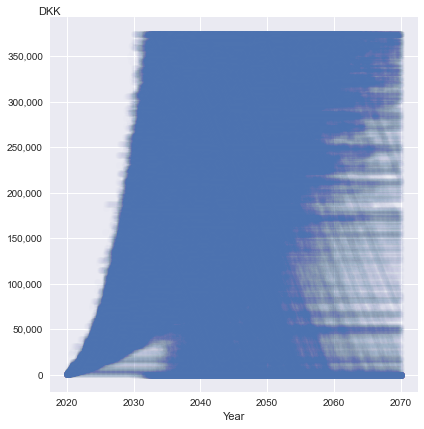

In [8]:
plt.style.use('seaborn')
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
#sns.lineplot(data = clean_data, x = 'period', y = 'interest', ax = ax)
#ax2 = ax.twinx()
sns.scatterplot(data = clean_data, x = 'period', y = 'total_debt', ax = ax, alpha=0.01)
ax.set_xlabel('Year')
ax.set_ylabel('DKK', rotation=0, loc='top', labelpad=-53)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#ax.legend(['Leveraged strategy', 'Unleveraged strategy'])
fig.tight_layout()
#fig.savefig('Empirical/Net_monthly_investments.png')

In [11]:
pivoted_data = data.reset_index(level=0)

In [21]:
total_debt = pivoted_data.pivot(columns = 'random_state', values='total_debt')

In [26]:
total_debt_long = total_debt.melt(ignore_index=False).reset_index()

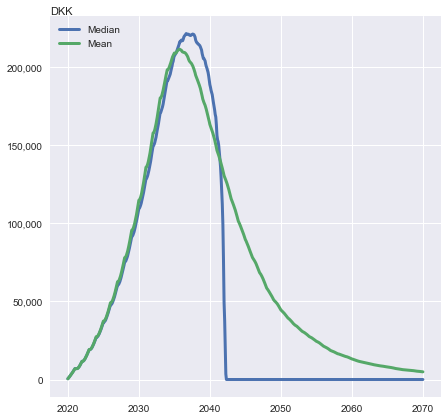

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
#ax.scatter(x = total_debt_long.period, y=total_debt_long.value, color='rosybrown', alpha=0.005);
ax.plot(pivoted_data.groupby(level=0).median().loc[:, ['total_debt']], linewidth=3);
ax.plot(pivoted_data.groupby(level=0).mean().loc[:, ['total_debt']], linewidth=3);
#.set_ylim(0, 280000);
ax.legend(['Median', 'Mean'], loc='upper left');
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel('DKK', rotation=0, loc='top', labelpad=-65);
fig.savefig('Empirical/mean_median_total_debt.png', bbox_inches = 'tight', pad_inches = 0.1)